In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model class that inherits the nn.Module
class Model(nn.Module):
  #Input Layer- Four Features of the Flower
  #Hidden Layer1- (number of neurons)
  #H2(n)
  #output- three classes of the iris flower

  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()  #instantiate the nn.Module
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)

    return x


In [3]:
# Pick a random seed for randomization
torch.manual_seed(31)
#create an instance of the model
model=Model()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df=pd.read_csv(url)

In [6]:
my_df


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [7]:
my_df['variety']=my_df['variety'].replace('Setosa',0.0)
my_df['variety']=my_df['variety'].replace('Versicolor',1.0)
my_df['variety']=my_df['variety'].replace('Virginica',2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
#Train test split. Set X,y ====x is the feature and y is the output
X=my_df.drop('variety',axis=1)
y=my_df['variety']

In [9]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: variety, Length: 150, dtype: float64

In [11]:
#convert these to numpy values
X=X.values
y=y.values

In [12]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=31)


In [15]:
# Convert X features to float Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [16]:
# Convert y labels to Long Tensors
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [17]:
# Set the criteria of the model to measure the error, how far off the predictions are from the data(same as the loss module)
criterion=nn.CrossEntropyLoss()
#Choose optimizer- The Adam optimizer, learning rate lr(if error doesnot go down after a certain number of iterations(also know as epochs), lower our learning rate)
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)

In [18]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [19]:
#Train our model
#Epochs? (one run through all the training data in our network)
epochs=100
losses=[]
for i in range(epochs):
  #go forward and get a prediction
  y_pred=model.forward(X_train) #Get predicted results

  #Measure the loss/error. gonna be high at first
  loss=criterion(y_pred,y_train)  # predicted values vs the y_train

  # Keep track of the losses
  losses.append(loss.detach().numpy()) #it wold be a tensor so changed to numpy

  # Print every 10 epochs
  if i%10==0:
    print(f'Epoch:{i} and loss: {loss}')


  # Do backpropagation: take the error rate of the forward propagation and feed it back
  # through the network to fine tune the weights

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch:0 and loss: 1.0937405824661255
Epoch:10 and loss: 0.954168438911438
Epoch:20 and loss: 0.763039767742157
Epoch:30 and loss: 0.5463483929634094
Epoch:40 and loss: 0.40072497725486755
Epoch:50 and loss: 0.30981937050819397
Epoch:60 and loss: 0.2280203253030777
Epoch:70 and loss: 0.15545906126499176
Epoch:80 and loss: 0.10560853034257889
Epoch:90 and loss: 0.0771203264594078


Text(0.5, 0, 'epoch')

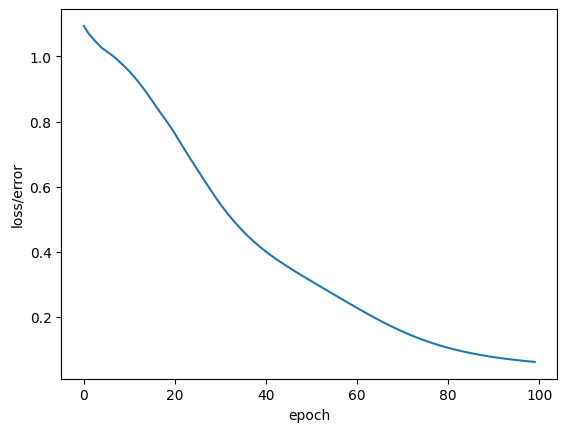

In [20]:
# Graph it out
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")


In [21]:
# Evaluate model based on Test Dataset
with torch.no_grad(): #Basically turn off the backpropagation
  y_eval=model.forward(X_test)  # X_test are the features from the testset, y_eval will be the predictions
  loss=criterion(y_eval,y_test) # Find the loss or error

In [22]:
for i,data in enumerate(X_test):
  print(f"At {i} we have {data} ")

At 0 we have tensor([5.6000, 3.0000, 4.5000, 1.5000]) 
At 1 we have tensor([6.4000, 2.8000, 5.6000, 2.2000]) 
At 2 we have tensor([4.6000, 3.2000, 1.4000, 0.2000]) 
At 3 we have tensor([5.7000, 2.9000, 4.2000, 1.3000]) 
At 4 we have tensor([6.8000, 3.0000, 5.5000, 2.1000]) 
At 5 we have tensor([4.8000, 3.0000, 1.4000, 0.3000]) 
At 6 we have tensor([6.3000, 2.7000, 4.9000, 1.8000]) 
At 7 we have tensor([5.7000, 3.0000, 4.2000, 1.2000]) 
At 8 we have tensor([5.7000, 4.4000, 1.5000, 0.4000]) 
At 9 we have tensor([5.1000, 3.7000, 1.5000, 0.4000]) 
At 10 we have tensor([6.1000, 2.6000, 5.6000, 1.4000]) 
At 11 we have tensor([6.0000, 3.4000, 4.5000, 1.6000]) 
At 12 we have tensor([6.0000, 3.0000, 4.8000, 1.8000]) 
At 13 we have tensor([4.3000, 3.0000, 1.1000, 0.1000]) 
At 14 we have tensor([7.7000, 3.8000, 6.7000, 2.2000]) 
At 15 we have tensor([6.0000, 2.7000, 5.1000, 1.6000]) 
At 16 we have tensor([6.3000, 2.5000, 4.9000, 1.5000]) 
At 17 we have tensor([6.0000, 2.9000, 4.5000, 1.5000]) 
At

In [23]:
loss

tensor(0.1675)

In [24]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)

    # Will tell us what the network thinks about our data
    print(f"{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

    # Correct or not

    if y_val.argmax().item()==y_test[i]:
      correct+=1

print(f"we got {correct} corrects.")

1.) tensor([-2.5918,  4.0058,  3.3213]) 	 1 	 1
2.) tensor([-6.1411,  3.0714,  8.9016]) 	 2 	 2
3.) tensor([  7.4557,   2.7430, -10.7721]) 	 0 	 0
4.) tensor([-1.3471,  4.4318,  1.3384]) 	 1 	 1
5.) tensor([-5.0695,  3.6746,  7.1322]) 	 2 	 2
6.) tensor([  7.4716,   2.7478, -10.7957]) 	 0 	 0
7.) tensor([-3.7070,  3.8116,  5.0484]) 	 2 	 2
8.) tensor([-0.9983,  4.5914,  0.7721]) 	 1 	 1
9.) tensor([  8.8675,   3.1819, -12.8756]) 	 0 	 0
10.) tensor([  7.9793,   2.9621, -11.5676]) 	 0 	 0
11.) tensor([-4.3481,  3.5253,  6.0873]) 	 2 	 2
12.) tensor([-2.1640,  4.4561,  2.5596]) 	 1 	 1
13.) tensor([-3.6296,  3.8168,  4.9307]) 	 2 	 2
14.) tensor([  7.0962,   2.6344, -10.2368]) 	 0 	 0
15.) tensor([-6.3609,  3.9439,  9.0020]) 	 2 	 2
16.) tensor([-3.8991,  3.6405,  5.3822]) 	 1 	 2
17.) tensor([-2.9925,  3.9978,  3.9256]) 	 1 	 1
18.) tensor([-2.2136,  4.2646,  2.6846]) 	 1 	 1
19.) tensor([-6.3143,  2.7315,  9.2515]) 	 2 	 2
20.) tensor([  7.1481,   2.6501, -10.3140]) 	 0 	 0
21.) tensor

In [25]:
# Testing the model on a new dataset
with torch.no_grad():
  new_iris=torch.Tensor([5.9,3.0,5.1,1.8])
  print(model(new_iris))



tensor([-4.3759,  3.5346,  6.1267])


In [26]:
# Save NN model
torch.save(model.state_dict(),"my_iris_model.pt")

In [27]:
# Load the model
new_model=Model()
new_model.load_state_dict(torch.load("my_iris_model.pt"))

<All keys matched successfully>

In [28]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)